# Explore here

### We import the necessary modules for the project.

In [2]:
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer


### We now download and store the data into /data/raw/*

In [3]:
# We specify the file we are downloading and where it is going to be saved.
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
output_path = r'D:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\MACHINELEARNING\ML-Exercise\data\raw\data.csv'

In [3]:
# We will use 
response = requests.get(url)
with open(output_path, 'wb') as my_file:
    my_file.write(response.content)

print(f"File downloaded to {output_path}")

### We now generate a dataframe to work with it.

In [4]:
df = pd.read_csv(r'D:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\MACHINELEARNING\ML-Exercise\data\raw\data.csv', sep=";")
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
# We check the shape to have a better image of the dataframe:
df.shape


(41188, 21)

In [7]:
# We check the information of the dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# From the data we have we will now check the information that might not be relevant at all for the goal we have in our prediction.
    1 - age. Age of customer (numeric) - YES
    2 - job. Type of job (categorical) - YES
    3 - marital. Marital status (categorical) - YES
    4 - education. Level of education (categorical) - YES
    5 - default. Do you currently have credit (categorical) - YES
    6 - housing. Do you have a housing loan (categorical) - YES
    7 - loan. Do you have a personal loan? (categorical) - YES
    8 - contact. Type of contact communication (categorical) - MAYBE 
    9 - month. Last month in which you have been contacted (categorical) - MAYBE
    10 - day_of_week. Last day on which you have been contacted (categorical) - MAYBE    
    11 - duration. Duration of previous contact in seconds (numeric) - MAYBE
    12 - campaign. Number of contacts made during this campaign to the customer (numeric) - MAYBE
    13 - pdays. Number of days that elapsed since the last campaign until the customer was contacted (numeric) - MAYBE
    14 - previous. Number of contacts made during the previous campaign to the customer (numeric) - MAYBE
    15 - poutcome. Result of the previous marketing campaign (categorical) - MAYBE
    16 - emp.var.rate. Employment variation rate. Quarterly indicator (numeric) - YES
    17 - cons.price.idx. Consumer price index. Monthly indicator (numeric) - YES
    18 - cons.conf.idx. Consumer confidence index. Monthly indicator (numeric) - YES
    19 - euribor3m. EURIBOR 3-month rate. Daily indicator (numeric) - MAYBE [WE HAVE TO CHECK THIS ONE TO FIND OUT IT IS A PERSONAL VALUE OR A GENERAL VALUE, IN WHICH CASE WOULD BE A NO.]
    20 - nr.employed. Number of employees. Quarterly indicator (numeric) - MAYBE [NUMBER OF EMPLOYEES OF THE BANK OR THAT HE MANAGES? PROBABLE IT IS A NO]

These decisions were made by looking at the description of the column title and its explanation. Those that have a MAYBE must be examined to determine if they will be relevant or not.

In [8]:
# We will check if there is any column that has a unique variable.
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

As there are no columns with a unique variable, we will proceed to check the value counts of each column to obtain a clearer view of the data we will work with, as well as identify inconsistencies.

In [9]:
# We generate a loop to iterate on each column.
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("-" * 40)

Value counts for age:
age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64
----------------------------------------
Value counts for job:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
----------------------------------------
Value counts for marital:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
----------------------------------------
Value counts for education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown             

The columns month, day_of_week, duration and campaign are results obtained after having contact with the customer during this campaign. Because we are aiming to predict before contacting our customer if he is a potential candidate, this information would not be available for the person aiming to predict.

Therefore we will drop those columns.

In [10]:
df.drop(columns = ["month","day_of_week","duration","campaign"], inplace = True)


The default column has only 3 instances marked as 'Yes' out of 41,188 entries, with the remaining values being 'No' (32,588) and 'Unknown' (8,597). Although the 'Yes' cases are rare, it’s possible that having a default doesn’t necessarily mean a customer will be excluded from selection. It’s likely that much of the database was previously filtered, discarding these customers before any contact attempts were made. We will visually inspect the data for the 'Unknown' and 'Yes' responses to explore this further.

In [11]:
df.head()

,age,job,marital,education,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
# We will now check if all the default = yes values do have the same result, which we believe will be "no".

# We create a boolean mask for rows where 'default' is equal to 'Yes'
mask = df['default'].isin(['yes'])

# We use the mask to filter the DataFrame and select only 'default' and 'y' columns
filtered_df = df.loc[mask, ['default', 'y']]

print(filtered_df)

      default   y
21580     yes  no
21581     yes  no
24866     yes  no


In [13]:
# We will now check if the unknown value have all the same result.
# We create a boolean mask for rows where 'default' is 'unknown'
mask = df['default'].isin(['unknown'])

# We use the mask to filter the DataFrame and select only 'default' and 'y' columns
filtered_df = df.loc[mask, ['default', 'y']]

print(filtered_df.value_counts())

default  y  
unknown  no     8154
         yes     443
Name: count, dtype: int64


It’s possible that the low number of entries with default = yes is due to a manual pre-filtering process performed by bank employees, since we only have data for those contacted during the last campaign. We could assume this is the case, which would explain the small number of 'Yes' values. However, this raises concerns about potential bias, especially due to the limited data, which could lead to data leakage during the training phase.

To address this, we will transform the default column into a binary feature, where 'Yes' and 'No' are combined into (1) and 'Unknown' becomes (0), indicating whether the default status is known. We will then assess the relevance of this variable for the model.

In [14]:
# We will specify the values in the mapping (no or yes = 1, unknown = 0).
mapping = {'no': 1, 'yes': 1, 'unknown': 0}

df['default'] = df['default'].map(mapping)

In [15]:
df['default'].value_counts()

default
1    32591
0     8597
Name: count, dtype: int64

In [16]:
# We print the top bit to refresh our memory on how the project is looking like.
df.head()

,age,job,marital,education,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,1,no,no,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,0,no,no,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,1,yes,no,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,1,no,no,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,1,no,yes,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### We will now address the loan column, we would have prefered to do a binary selection from yes and no, however, we saw it has 3 unique values. We will see the percentages to decide how to continue.

In [17]:
print(df['loan'].unique())

['no' 'yes' 'unknown']


In [18]:
loan_distribution = df['loan'].value_counts(normalize=True)
print(loan_distribution)

loan
no         0.824269
yes        0.151695
unknown    0.024036
Name: proportion, dtype: float64


We can see there is a significant imbalance between yes and no, where the no values represent 82% of the data in the loan column, which could affect to the model's performance.

We will continue by investigating the characteristics of the 'unknown' group. We aim to find out if their results differ significantly from 'yes' or 'no' groups in other columns.

We will aswell analyse the relationship between loan status and other variables in the dataset.

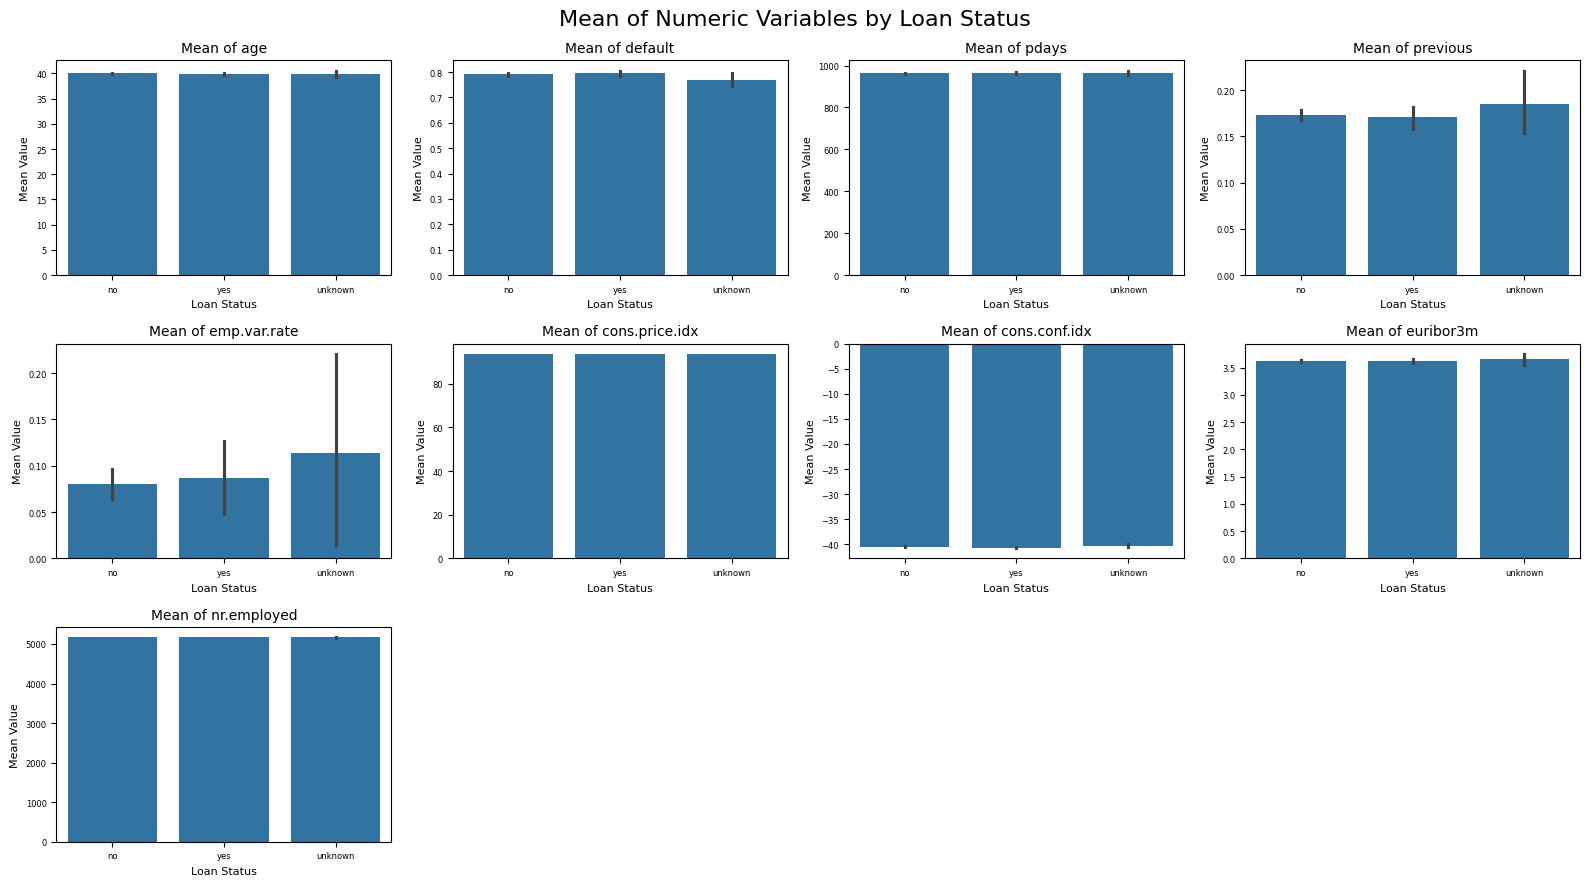

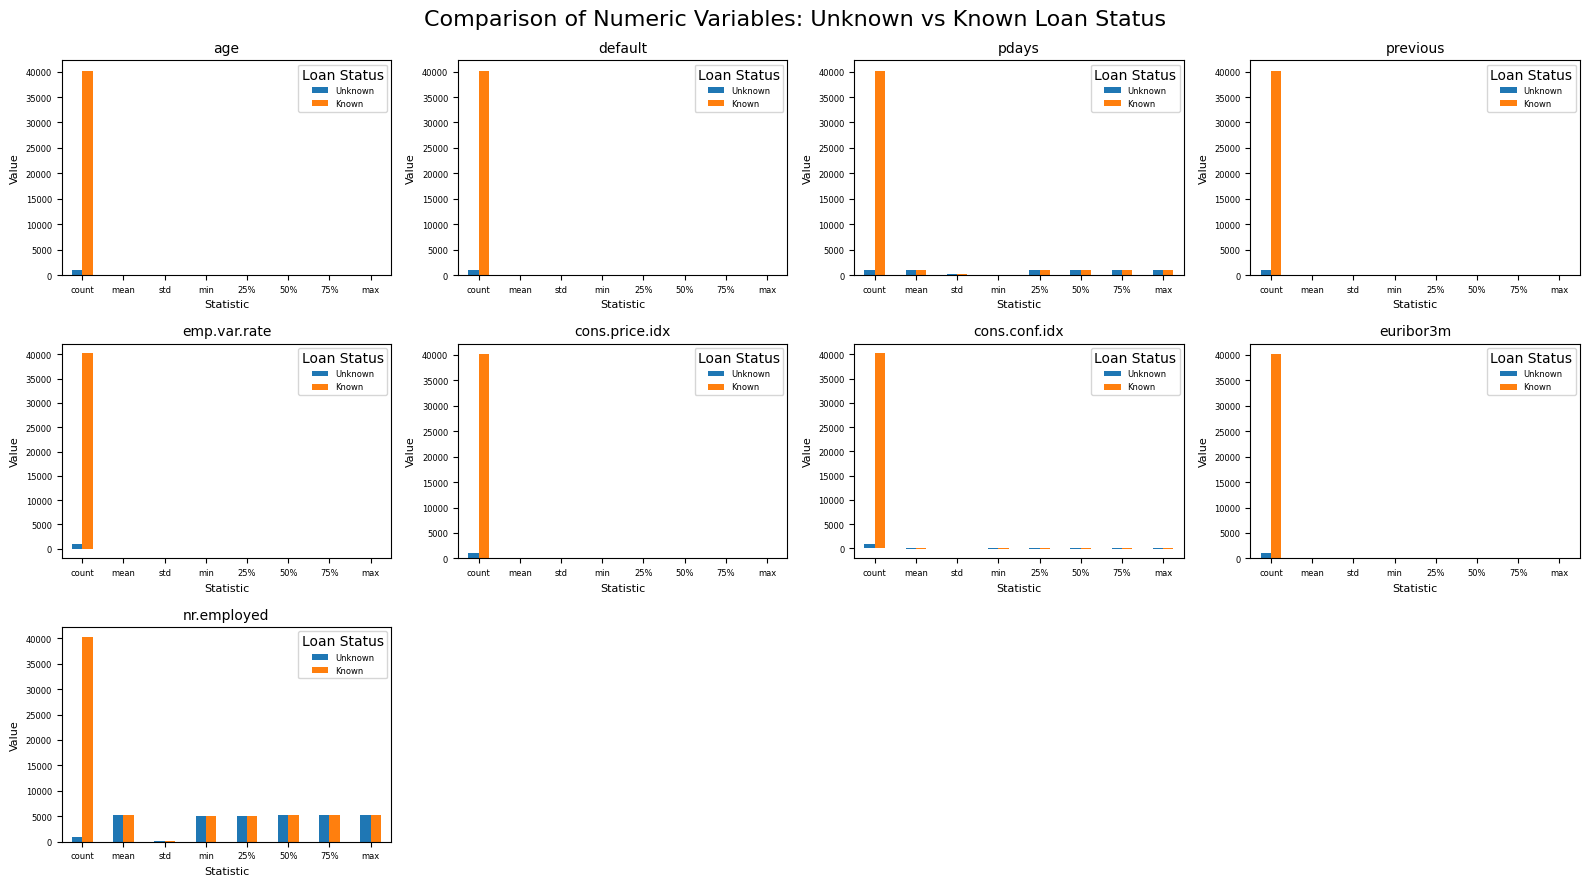

In [19]:
plt.style.use('default')

# Analyze relationships with other variables that have numbers.
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a figure with subplots for each numeric column, 4 per row
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 3 * 3))
fig.suptitle('Mean of Numeric Variables by Loan Status', fontsize=16)

for i, column in enumerate(numeric_columns):
    ax = axes[i // 4, i % 4] if 3 > 1 else axes[i % 4]
    sns.barplot(x='loan', y=column, data=df, ax=ax)
    ax.set_title(f'Mean of {column}', fontsize=10)
    ax.set_xlabel('Loan Status', fontsize=8)
    ax.set_ylabel('Mean Value', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.tick_params(axis='x')

# Remove any unused subplots
for i in range(len(numeric_columns), 3 * 4):
    fig.delaxes(axes[i // 4, i % 4] if 3 > 1 else axes[i % 4])

plt.tight_layout()
plt.show()

# Characteristics of 'unknown' group vs 'known' group
unknown_profile = df[df['loan'] == 'unknown'].describe()
known_profile = df[df['loan'] != 'unknown'].describe()

# Create a comparison plot for 'unknown' vs 'known' groups
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 3 * 3))
fig.suptitle('Comparison of Numeric Variables: Unknown vs Known Loan Status', fontsize=16)

for i, column in enumerate(numeric_columns):
    ax = axes[i // 4, i % 4] if 3 > 1 else axes[i % 4]
    data = pd.DataFrame({
        'Unknown': unknown_profile.loc[:, column],
        'Known': known_profile.loc[:, column]
    })
    data.plot(kind='bar', ax=ax)
    ax.set_title(f'{column}', fontsize=10)
    ax.set_xlabel('Statistic', fontsize=8)
    ax.set_ylabel('Value', fontsize=8)
    ax.legend(title='Loan Status', fontsize=6)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.tick_params(axis='x', rotation=360)

# Remove any unused subplots
for i in range(len(numeric_columns), 3 * 4):
    fig.delaxes(axes[i // 4, i % 4] if 3 > 1 else axes[i % 4])

plt.tight_layout()
plt.show()

### We noticed that there are many columns with unknown values. We will highlight the unknown values in a matrix to see if we can observe some kind of visual pattern.

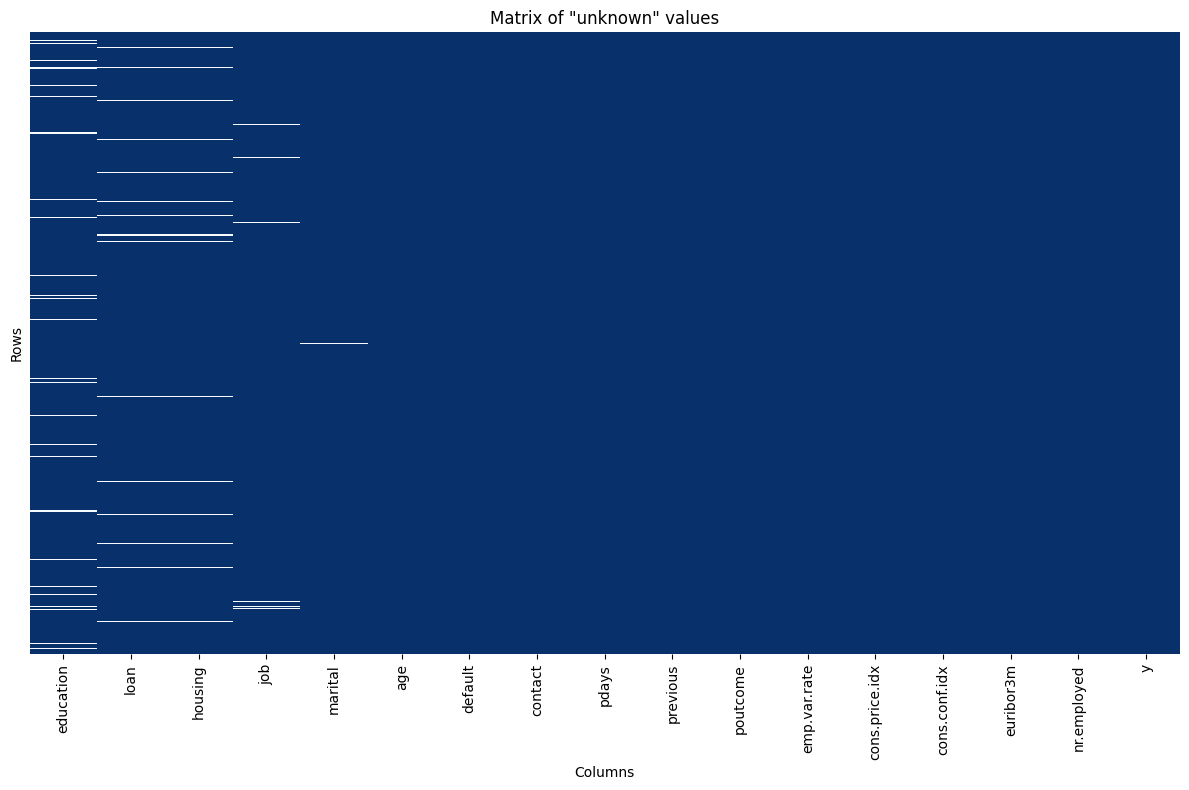

In [20]:
def unknown_matrix(df, unknown_value='unknown'):
    # Create a boolean matrix where True represents 'unknown' values
    unknown_matrix = (df == unknown_value).astype(int)

    # Calculate the sorting order based on the number of 'unknown' values
    sorted_columns = unknown_matrix.sum().sort_values(ascending=False).index

    # Reorder the matrix based on the sorting
    unknown_matrix = unknown_matrix[sorted_columns]

    # Create the plot
    plt.figure(figsize=(12, 8))
    sns.heatmap(unknown_matrix, cmap='Blues_r', cbar=False, yticklabels=False)

    # Customize the plot
    plt.title('Matrix of "unknown" values')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

unknown_matrix(df)

Because we are looking for a binary column for loan, and from the analysis made, we didnt find any main differences between the groups correlations, besides the ammount of data they cover, we will proceed to fill the unknown values with K-nearest.

In [22]:
# We replace categories with numeric values and transform unknown to nan values to be ready for the next step.
df['loan'] = df['loan'].replace({'yes': 1, 'no': 0, 'unknown': np.nan}).infer_objects(copy=False)

# We prepare 2D array of data for imputation.
X = df[['loan']].values

# We perform imputation.
imputer = KNNImputer(n_neighbors=5)
df['loan'] = imputer.fit_transform(X)

# We round to nearest integer and map back to categories
df['loan'] = df['loan'].round().astype(int)

# We check the values in the loan table.
df['loan'].value_counts()

loan
0    34940
1     6248
Name: count, dtype: int64

The next column to check, will be housing, for we want it to be binary as well, due to either having a housing loan or not.

In [23]:
# We begin by checking the unique value count to see if there is an imbalance aswell.

housing_loan_distribution = df['housing'].value_counts(normalize=True)
print(housing_loan_distribution)

housing
yes        0.523842
no         0.452122
unknown    0.024036
Name: proportion, dtype: float64


We can see there is a balanced amount of data, where 52% of the instances do have a housing loan, while only 2% is unknown.

We will perform as well a k-nearest to fill the unknown values with a binary result.

In [25]:
# We replace categories with numeric values and transform unknown to nan values to be ready for the next step.
df['housing'] = df['housing'].replace({'yes': 1, 'no': 0, 'unknown': np.nan}).infer_objects(copy=False)

# We prepare 2D array of data for imputation.
X = df[['housing']].values

# We perform imputation.
imputer = KNNImputer(n_neighbors=5)
df['housing'] = imputer.fit_transform(X)

# We round to nearest integer and map back to categories
df['housing'] = df['housing'].round().astype(int)

# We check the values in the loan table.
df['housing'].value_counts()

housing
1    22566
0    18622
Name: count, dtype: int64

In [26]:
new_housing_loan_distribution = df['housing'].value_counts(normalize=True)
print(housing_loan_distribution)
print("-"*40)
print(new_housing_loan_distribution)

housing
yes        0.523842
no         0.452122
unknown    0.024036
Name: proportion, dtype: float64
----------------------------------------
housing
1    0.547878
0    0.452122
Name: proportion, dtype: float64


It looks like all the unknown values in the rest of the data are very similar to the values of housing = yes

In [27]:
df.head()

,age,job,marital,education,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,1,0,0,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,0,0,0,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,1,1,0,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,1,0,0,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,1,0,1,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We will now check the poutcome, which we will encode. For nonexistent means they were not contacted for the previous campaign, and their previous results (success and failure).

In [29]:
df["poutcome"].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [30]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df['poutcome'], df['y'], normalize='index')

# Display the results
print(cross_tab)

# Calculate the counts (not percentages) for a clearer view of absolute numbers
cross_tab_counts = pd.crosstab(df['poutcome'], df['y'])
print("\nCounts:")
print(cross_tab_counts)

# For those in 'failure' category
failure_results = df[df['poutcome'] == 'failure']['y'].value_counts(normalize=True)
print("\nResults for 'failure' category:")
print(failure_results)

# For those in 'success' category
success_results = df[df['poutcome'] == 'success']['y'].value_counts(normalize=True)
print("\nResults for 'success' category:")
print(success_results)

y                  no       yes
poutcome                       
failure      0.857714  0.142286
nonexistent  0.911678  0.088322
success      0.348871  0.651129

Counts:
y               no   yes
poutcome                
failure       3647   605
nonexistent  32422  3141
success        479   894

Results for 'failure' category:
y
no     0.857714
yes    0.142286
Name: proportion, dtype: float64

Results for 'success' category:
y
yes    0.651129
no     0.348871
Name: proportion, dtype: float64


We observe how both the previous failure outcomes and nonexistent contact had mostly a negative answer. And those that were successful in the past, were not really that successful. We were considering to map unknown as 0, failure as 1 and succes as 2, for the when the previous outcome is nonexistent, it's highly likely to result in a 'no' (91.17%), previous failures mostly lead to 'no' outcomes (85.77%) and previous successes tend to lead to 'yes' outcomes, but not always (65.11%). However, the distances between the % of success is not equal, and it could lead to a linear progression from unknown to success, which might not reflect reality.

We decided instead to binary encoding but with the following approach:
    1- had_previous_contact
    2- previous_success
This way we will be stating which of them were previously contacted and if that contact was successful, mainly because the % of success between those that didn't have previous contact and those that previously didn't succeed are very likely to not be successful anyways.

In [31]:
# Had previous contact
df['had_previous_contact'] = (df['poutcome'] != 'nonexistent').astype(int)

# Previous contact was successful
df['previous_success'] = (df['poutcome'] == 'success').astype(int)

# Drop the original 'poutcome' column
df = df.drop('poutcome', axis=1)

In [32]:
df.head()

,age,job,marital,education,default,housing,loan,contact,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,had_previous_contact,previous_success
0,56,housemaid,married,basic.4y,1,0,0,telephone,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0
1,57,services,married,high.school,0,0,0,telephone,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0
2,37,services,married,high.school,1,1,0,telephone,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0
3,40,admin.,married,basic.6y,1,0,0,telephone,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0
4,56,services,married,high.school,1,0,1,telephone,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0


************************ WE ARE DOING JOBS NOW. WE WILL GROUP BY INCOME SAVINGS POTENTIAL=?=?=? ********************

In [33]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df['job'], df['y'], normalize='index')

# Display the results
print(cross_tab)

# Calculate the counts (not percentages) for a clearer view of absolute numbers
cross_tab_counts = pd.crosstab(df['job'], df['y'])
print("\nCounts:")
print(cross_tab_counts)

# Iterate through unique job values and calculate normalized counts
for job_value in df['job'].unique():
    job_results = df[df['job'] == job_value]['y'].value_counts(normalize=True)
    print(f"\nResults for '{job_value}' category:")
    print(job_results)

y                    no       yes
job                              
admin.         0.870274  0.129726
blue-collar    0.931057  0.068943
entrepreneur   0.914835  0.085165
housemaid      0.900000  0.100000
management     0.887825  0.112175
retired        0.747674  0.252326
self-employed  0.895144  0.104856
services       0.918619  0.081381
student        0.685714  0.314286
technician     0.891740  0.108260
unemployed     0.857988  0.142012
unknown        0.887879  0.112121

Counts:
y                no   yes
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37

Results for 'housemaid' category:
y
no     0.9
yes    0.1
Name: proportion, dtype: float64

Results for 'services' category:
y
no     0.918619
yes    